## 1.Загрузить данные провести минимальную обработку

In [458]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-ticks')
sns.style = "seaborn-ticks"
#%matplotlib inline

from sklearn.model_selection import train_test_split

In [459]:
DATASET_PATH = 'data/train.csv'
TEST_DATASET_PATH = 'data/test.csv'

### Общие функции

In [460]:
def draw_boxplot_graphics(df:pd.core.frame.DataFrame, columns:list):
    'Рисует графики BoxPlots для переденных колонок'   
    for col in columns:
        plt.figure(figsize=(14, 1))
        sns.boxplot(data=df[col].values, orient='h', palette='Set2')
        plt.xlabel(col,fontdict={'fontsize':14})   
        
    plt.show()

In [461]:
df_train = pd.read_csv(DATASET_PATH, index_col='Id')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [462]:
df_test = pd.read_csv(TEST_DATASET_PATH, index_col='Id')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

In [463]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.000,50.401,43.588,0.000,20.000,36.000,75.000,209.000
Rooms,10000.000,1.891,0.840,0.000,1.000,2.000,2.000,19.000
Square,10000.000,56.316,21.059,1.137,41.775,52.513,65.901,641.065
LifeSquare,7887.000,37.200,86.241,0.371,22.770,32.781,45.129,7480.592
KitchenSquare,10000.000,6.273,28.561,0.000,1.000,6.000,9.000,2014.000
Floor,10000.000,8.527,5.241,1.000,4.000,7.000,12.000,42.000
HouseFloor,10000.000,12.609,6.776,0.000,9.000,13.000,17.000,117.000
HouseYear,10000.000,3990.166,200500.261,1910.000,1974.000,1977.000,2001.000,20052011.000
Ecology_1,10000.000,0.119,0.119,0.000,0.018,0.075,0.196,0.522
Social_1,10000.000,24.687,17.533,0.000,6.000,25.000,36.000,74.000


In [464]:
#уберем самые "страшные" выбросы, на Boxplot ниже, проверим, их отсутствие
df_train.drop(df_train[df_train['LifeSquare'] > 600].index, inplace=True)
df_train.drop(df_train[df_train['KitchenSquare'] > 600].index, inplace=True)
df_train.drop(df_train[df_train['HouseYear'] > 2020].index, inplace=True)

df_train.shape

(9994, 19)

In [465]:
#features_list = df_train.select_dtypes(exclude='object').columns.tolist()
#draw_boxplot_graphics(df_train, features_list)

In [466]:
# Заполняем пропуски LifeSquare медианой
df_train['LifeSquare'].fillna(value=df_train['LifeSquare'].median(), inplace=True)

df_test['LifeSquare'].fillna(value=df_train['LifeSquare'].median(), inplace=True)

In [467]:
#Ecology_2, Ecology_3, Shops_2
print(df_train['Ecology_2'].value_counts())
print(df_train['Ecology_3'].value_counts())
print(df_train['Shops_2'].value_counts())

B    9897
A      97
Name: Ecology_2, dtype: int64
B    9719
A     275
Name: Ecology_3, dtype: int64
B    9170
A     824
Name: Shops_2, dtype: int64


In [468]:
df_dummies = pd.get_dummies(df_train, columns=['Ecology_2', 'Ecology_3', 'Shops_2'])
df_dummies.drop(axis=1,columns=['Ecology_2_B', 'Ecology_3_B', 'Shops_2_B'], inplace=True)
df_train[['Ecology_2', 'Ecology_3', 'Shops_2']] = df_dummies[['Ecology_2_A', 'Ecology_3_A', 'Shops_2_A']]

print(df_train['Ecology_2'].value_counts())
print(df_train['Ecology_3'].value_counts())
print(df_train['Shops_2'].value_counts())

0    9897
1      97
Name: Ecology_2, dtype: int64
0    9719
1     275
Name: Ecology_3, dtype: int64
0    9170
1     824
Name: Shops_2, dtype: int64


In [469]:
df_dummies = pd.get_dummies(df_test, columns=['Ecology_2', 'Ecology_3', 'Shops_2'])
df_dummies.drop(axis=1,columns=['Ecology_2_B', 'Ecology_3_B', 'Shops_2_B'], inplace=True)
df_test[['Ecology_2', 'Ecology_3', 'Shops_2']] = df_dummies[['Ecology_2_A', 'Ecology_3_A', 'Shops_2_A']]

print(df_test['Ecology_2'].value_counts())
print(df_test['Ecology_3'].value_counts())
print(df_test['Shops_2'].value_counts())

0    4952
1      48
Name: Ecology_2, dtype: int64
0    4851
1     149
Name: Ecology_3, dtype: int64
0    4588
1     412
Name: Shops_2, dtype: int64


In [470]:
#Удалим. Как заполнять пропуски не знаю. Но оставим признак, было заполнено или нет
def fill_healthcare_1(x):
    if pd.notna(x):
        return 1
    else:
        return 0

df_train['Healthcare_1_filled'] = df_train['Healthcare_1'].apply(fill_healthcare_1)
df_train.drop('Healthcare_1', axis=1, inplace=True)
print(df_train['Healthcare_1_filled'].value_counts())

1    5198
0    4796
Name: Healthcare_1_filled, dtype: int64


In [471]:
#Удалим. Как заполнять пропуски не знаю. Но оставим признак, было заполнено или нет
def fill_healthcare_1(x):
    if pd.notna(x):
        return 1
    else:
        return 0

df_test['Healthcare_1_filled'] = df_test['Healthcare_1'].apply(fill_healthcare_1)
df_test.drop('Healthcare_1', axis=1, inplace=True)
print(df_test['Healthcare_1_filled'].value_counts())

1    2623
0    2377
Name: Healthcare_1_filled, dtype: int64


#### Итоги базовой чистки

In [472]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DistrictId           9994 non-null   int64  
 1   Rooms                9994 non-null   float64
 2   Square               9994 non-null   float64
 3   LifeSquare           9994 non-null   float64
 4   KitchenSquare        9994 non-null   float64
 5   Floor                9994 non-null   int64  
 6   HouseFloor           9994 non-null   float64
 7   HouseYear            9994 non-null   int64  
 8   Ecology_1            9994 non-null   float64
 9   Ecology_2            9994 non-null   uint8  
 10  Ecology_3            9994 non-null   uint8  
 11  Social_1             9994 non-null   int64  
 12  Social_2             9994 non-null   int64  
 13  Social_3             9994 non-null   int64  
 14  Helthcare_2          9994 non-null   int64  
 15  Shops_1              9994 non-null

In [473]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DistrictId           5000 non-null   int64  
 1   Rooms                5000 non-null   float64
 2   Square               5000 non-null   float64
 3   LifeSquare           5000 non-null   float64
 4   KitchenSquare        5000 non-null   float64
 5   Floor                5000 non-null   int64  
 6   HouseFloor           5000 non-null   float64
 7   HouseYear            5000 non-null   int64  
 8   Ecology_1            5000 non-null   float64
 9   Ecology_2            5000 non-null   uint8  
 10  Ecology_3            5000 non-null   uint8  
 11  Social_1             5000 non-null   int64  
 12  Social_2             5000 non-null   int64  
 13  Social_3             5000 non-null   int64  
 14  Helthcare_2          5000 non-null   int64  
 15  Shops_1              5000 non-null 

In [474]:
df_train['Rooms'].value_counts()

2.000     3878
1.000     3702
3.000     2234
4.000      150
5.000       18
0.000        8
10.000       2
19.000       1
6.000        1
Name: Rooms, dtype: int64

### Дополнительная чистка выбросов

In [475]:
df_train.drop(df_train[df_train['Rooms'] > 7].index, inplace=True)
df_train.drop(df_train[df_train['Square'] > 250].index, inplace=True)
df_train.drop(df_train[df_train['LifeSquare'] > 150].index, inplace=True)
df_train.drop(df_train[df_train['KitchenSquare'] > 45].index, inplace=True)
df_train.drop(df_train[df_train['Floor'] > 30].index, inplace=True)
df_train.drop(df_train[df_train['HouseFloor'] > 60].index, inplace=True)
df_train.drop(df_train[df_train['HouseYear'] < 1920].index, inplace=True)

In [476]:
df_train.shape, f'Удалено: {round((1 - df_train.shape[0] / 10000) * 100,2)}%'

((9932, 19), 'Удалено: 0.68%')

In [477]:
#features_list = df_train.select_dtypes(exclude='object').columns.tolist()
#draw_boxplot_graphics(df_train, features_list)

### Логарифмируем некоторые признаки

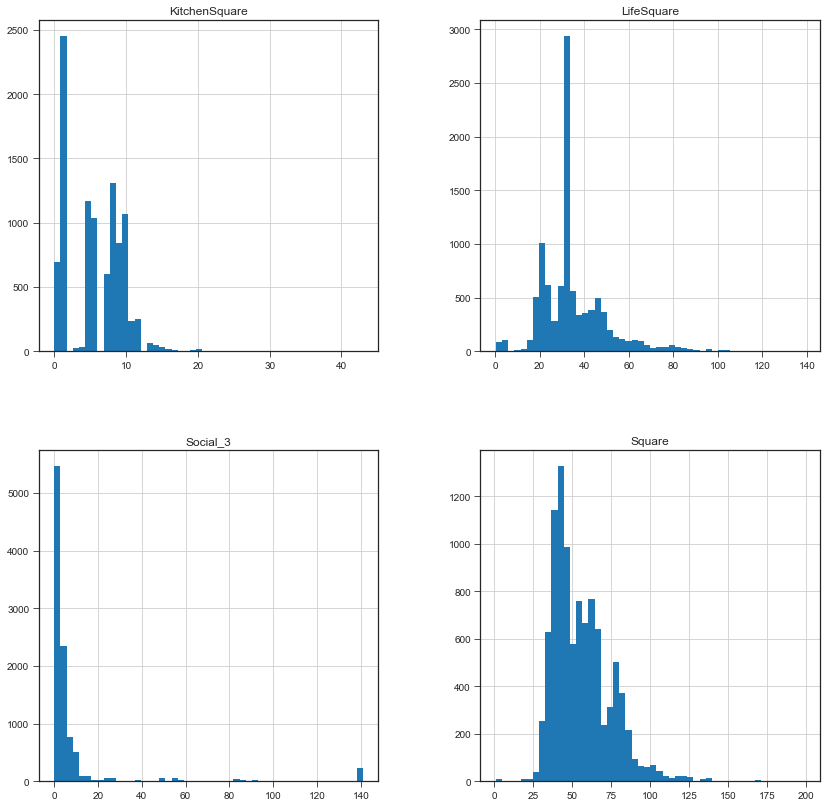

In [478]:
feature_num_names = ['Square', 'LifeSquare', 'KitchenSquare', 'Social_3']

df_train[feature_num_names].hist(figsize=(14,14), bins=50, grid=True);

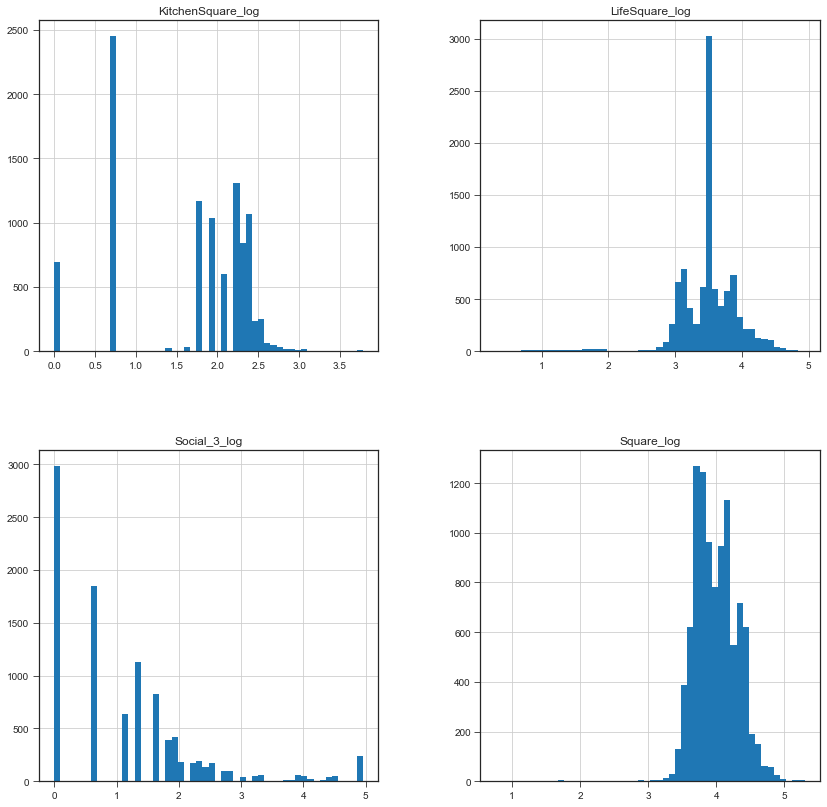

In [479]:
feature_log_names = []
for f in feature_num_names:
    df_train[f + '_log'] = np.log(df_train[f]+1)
    df_test[f + '_log'] = np.log(df_test[f]+1)
    feature_log_names.append(f + '_log')
    
df_train[feature_log_names].hist(figsize=(14,14), bins=50, grid=True);

### Новые признаки

In [480]:
df_train['PriceOneRoom'] = df_train['Price'] / df_train['Rooms']
df_train['PriceOneSquare'] = df_train['Price'] / df_train['Square']


In [481]:
def add_feat_by(groupby_feat, agg_feat, train, test):

    new_feat_name = agg_feat + 'By' + groupby_feat
    price_by = train.groupby([groupby_feat], as_index=False)\
                        .agg({agg_feat:'median'})\
                        .rename(columns={agg_feat:new_feat_name})

    train = train.merge(price_by, on=[groupby_feat], how='left').set_index(train.index)
    test = test.merge(price_by, on=[groupby_feat], how='left').set_index(test.index)
    
    test[new_feat_name].fillna(value=train[new_feat_name].median(), inplace=True)
    
    return train, test


def add_additional_features(groupby_features, agg_features, train, test):
    for agg_feat in agg_features:
        for groupby_feat in groupby_features:          
            train, test = add_feat_by(groupby_feat, agg_feat, train, test)
            
    return train, test

In [482]:
groupby_features = [
    'DistrictId', 
    'HouseYear', 
    'Ecology_1',
    'Floor',
    'Social_3',
    'Social_1',
    'Shops_1',
    'Rooms',
    'HouseFloor'
]

agg_features = [
    'PriceOneRoom',
    'PriceOneSquare'

]

df_train, df_test = add_additional_features(groupby_features, agg_features, df_train, df_test)

In [483]:
df_train.drop('PriceOneRoom', axis=1, inplace=True)
df_train.drop('PriceOneSquare', axis=1, inplace=True)


In [484]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DistrictId                  5000 non-null   int64  
 1   Rooms                       5000 non-null   float64
 2   Square                      5000 non-null   float64
 3   LifeSquare                  5000 non-null   float64
 4   KitchenSquare               5000 non-null   float64
 5   Floor                       5000 non-null   int64  
 6   HouseFloor                  5000 non-null   float64
 7   HouseYear                   5000 non-null   int64  
 8   Ecology_1                   5000 non-null   float64
 9   Ecology_2                   5000 non-null   uint8  
 10  Ecology_3                   5000 non-null   uint8  
 11  Social_1                    5000 non-null   int64  
 12  Social_2                    5000 non-null   int64  
 13  Social_3                    50

In [485]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9932 entries, 14038 to 6306
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DistrictId                  9932 non-null   int64  
 1   Rooms                       9932 non-null   float64
 2   Square                      9932 non-null   float64
 3   LifeSquare                  9932 non-null   float64
 4   KitchenSquare               9932 non-null   float64
 5   Floor                       9932 non-null   int64  
 6   HouseFloor                  9932 non-null   float64
 7   HouseYear                   9932 non-null   int64  
 8   Ecology_1                   9932 non-null   float64
 9   Ecology_2                   9932 non-null   uint8  
 10  Ecology_3                   9932 non-null   uint8  
 11  Social_1                    9932 non-null   int64  
 12  Social_2                    9932 non-null   int64  
 13  Social_3                    9

### Сохраняем очищенные датасеты

In [486]:
df_train.to_csv('train_prepared.csv', index=True)
df_test.to_csv('test_prepared.csv', index=True)

## Catboost

In [487]:
from sklearn.model_selection import  GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [488]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 5)) + 
          '\tMAE = ' + str(round(mean_absolute_error(true_values_train, pred_values_train), 5)) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 5)) +
          '\tMAE = ' + str(round(mean_absolute_error(true_values_test, pred_values_test), 5))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

In [489]:
from catboost import CatBoostRegressor

In [490]:
cat_features_idx = ['DistrictId', 'Floor', 'HouseFloor', 'Rooms', 'HouseYear', 'Social_1', 'Social_3', 'Shops_1']

df_train[cat_features_idx] = df_train[cat_features_idx].astype('str')
df_test[cat_features_idx] = df_test[cat_features_idx].astype('str')

In [491]:
X = df_train.drop('Price', axis=1)
y = df_train['Price']

X.shape, y.shape

((9932, 40), (9932,))

In [492]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7449, 40), (2483, 40), (7449,), (2483,))

In [493]:
ctb = CatBoostRegressor(random_seed=17, eval_metric='R2', silent=True, use_best_model=False)

In [494]:
%%time
ctb.fit(X_train, y_train,
        cat_features=cat_features_idx, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Wall time: 53.6 s


Train:	R2 = 0.86462	MAE = 21001.75895
Test:	R2 = 0.79014	MAE = 25505.89867


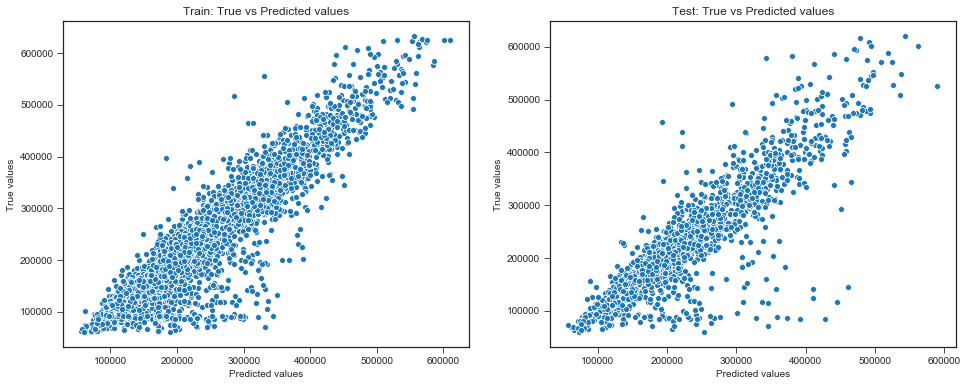

In [495]:
y_train_preds = ctb.predict(X_train)
y_test_preds = ctb.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

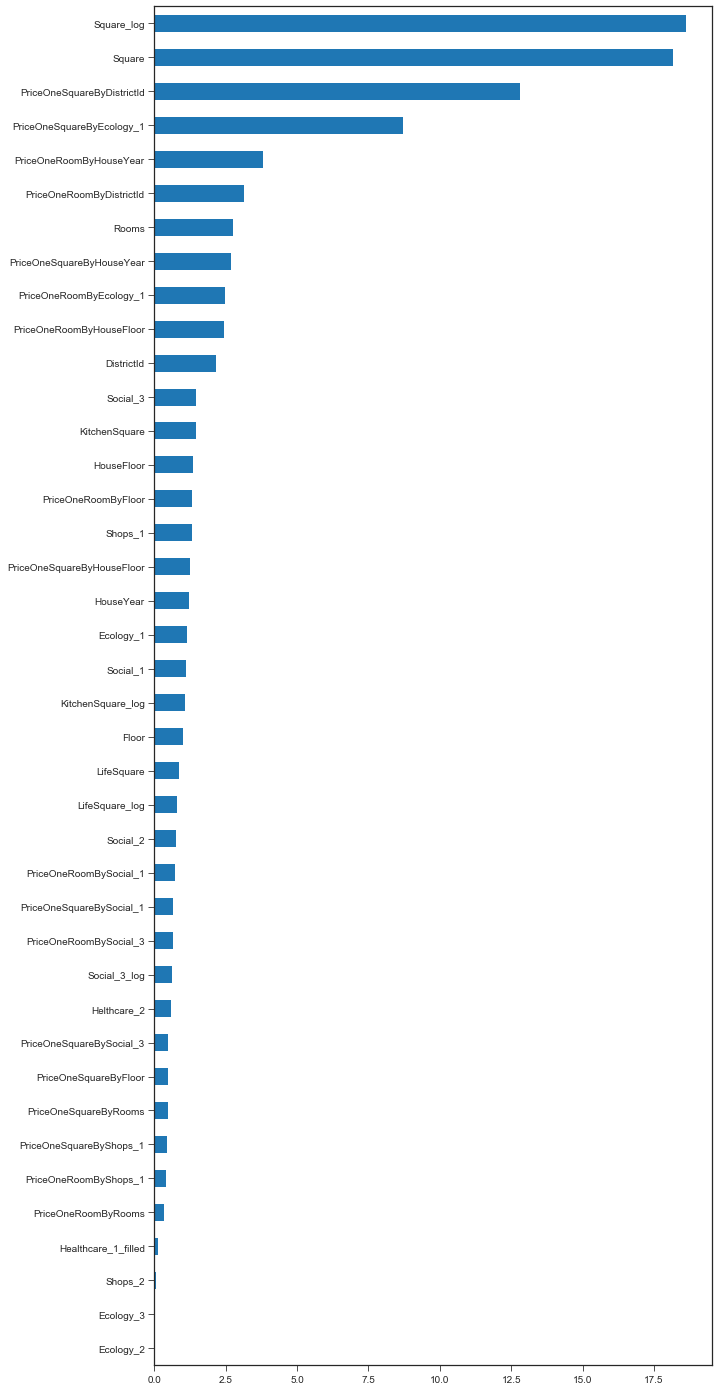

In [496]:
importances = ctb.feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns)
feat_importances.sort_values(ascending=True, inplace=True)

feat_importances.plot(kind='barh', figsize=(10, 25));

### Обучение тестовой выборки

In [497]:
%%time
ctb.fit(X, y,
        cat_features=cat_features_idx)

Wall time: 52 s


In [498]:
y_pred = ctb.predict(df_test)

preds = pd.DataFrame()
preds['Id'] = df_test.index
preds['Price'] = y_pred

In [499]:
preds.to_csv('submission.csv', index=False)

In [244]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,5000.000,1.910,0.839,0.000,1.000,2.000,2.000,17.000
Square,5000.000,56.450,19.093,1.379,41.906,52.921,66.285,223.454
LifeSquare,5000.000,35.456,15.920,0.333,25.850,32.781,41.770,303.071
KitchenSquare,5000.000,5.977,9.950,0.000,1.000,6.000,9.000,620.000
HouseYear,5000.000,1984.393,18.573,1908.000,1973.000,1977.000,2000.000,2020.000
Ecology_1,5000.000,0.120,0.120,0.000,0.020,0.072,0.196,0.522
Ecology_2,5000.000,0.010,0.098,0.000,0.000,0.000,0.000,1.000
Ecology_3,5000.000,0.030,0.170,0.000,0.000,0.000,0.000,1.000
Social_1,5000.000,24.934,17.532,0.000,6.000,25.000,36.000,74.000
Social_2,5000.000,5406.900,4026.615,168.000,1564.000,5285.000,7287.000,19083.000


In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

In [230]:
cat_features_idx = ['DistrictId', 'Floor', 'HouseFloor', 'Rooms']

df_train[cat_features_idx] = df_train[cat_features_idx].astype('float')
df_test[cat_features_idx] = df_test[cat_features_idx].astype('float')

df_train[cat_features_idx] = df_train[cat_features_idx].astype('int')
df_test[cat_features_idx] = df_test[cat_features_idx].astype('int')

In [107]:
forest = RandomForestRegressor(max_depth=19, 
                               max_features=5, 
                               n_estimators=400,
                               random_state=42)

In [108]:
X = df_train.drop('Price', axis=1)
y = df_train['Price']

X.shape, y.shape

((9940, 36), (9940,))

In [111]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

cv_score = cross_val_score(forest, X, y, scoring='r2', cv=kf)
print('R2: {:.5f}'.format(cv_score.mean()))

R2: 0.76389


In [109]:
forest.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=19, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [113]:
y_pred = forest.predict(df_test)

preds = pd.DataFrame()
preds['Id'] = df_test.index
preds['Price'] = y_pred

In [114]:
preds.to_csv('submission.csv', index=False)